Importamos algunas librerías auxiliares:

In [1]:
# import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Exploraremos algunas librerías y programas que nos pueden ayudar a manipular gráficas.

# NetworkX

La librería principal que utilizaremos será `networkx`:

In [2]:
import networkx as nx

`networkx` proporciona clases para manejar distintos tipos de gráficas. Las que nos interesan son `Graph` y `DiGraph`:

* `Graph`: Esta clase implementa una gráfica no dirigida, ignora aristas múltiples entre los vértices, y permite que haya aristas con un mismo vértice en ambos extremos (es decir, permite lazos).

* `DiGraph`: Como el nombre lo dice, esta nos permitirá trabajar con gráficas dirigidas.

Esta librería nos permite que los vértices tomen diferentes valores, pueden ser strings, tuplas, enteros y más.

Veamos ahora cómo crear y examinar elementos de una gráfica. Lo primero es crear nuestra gráfica $G$:

In [3]:
G = nx.Graph()

## Vértices

Los vértices pueden tener como etiquetas objetos que puedan ser *hasheados* (i.e., `int`, `float`, `str` y `tuple`). Hay dos funciones para añadir vértices a la gráfica:

* `add_node(n)`: Añade el vértice `n`.

* `add_nodes_from(L)`: Añade todos los elementos de la lista `L` como vértices.

Entonces, podemos hacer:

In [4]:
G.add_node(1)
G.add_node('A')
G.add_node((2,3))

In [5]:
G.add_nodes_from([5, 3.2, 'B', 'C'])

De igual manera, podemos pasar atributos adicionales que queremos que tenga el nodo como argumentos nombrados:

In [6]:
G.add_node('P', weight=5, height=9, x=1, y=0)

Podemos listar todos los vértices de la gráfica con `G.nodes`:

In [7]:
G.nodes

NodeView((1, 'A', (2, 3), 5, 3.2, 'B', 'C', 'P'))

Y accesar un nodo en específico como si fuese un diccionario:

In [8]:
print(f"1: {G.nodes[1]}")
print(f"P: {G.nodes['P']}")

1: {}
P: {'weight': 5, 'height': 9, 'x': 1, 'y': 0}


Finalmente, podemos visualizar nuestra gráfica usando `nx.draw`:

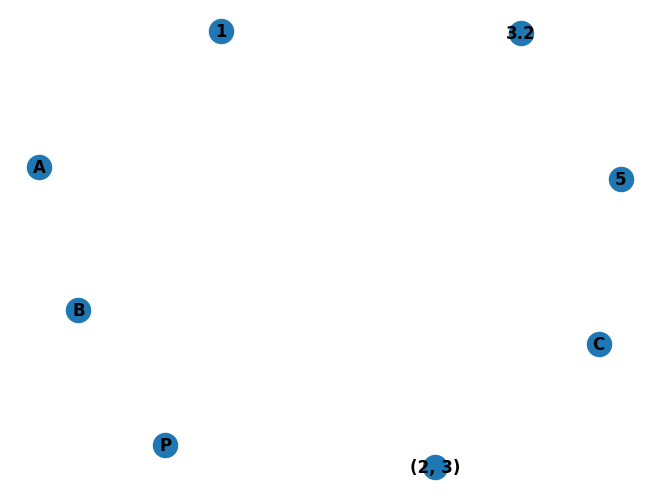

In [9]:
nx.draw(
    G,
    with_labels=True,
    font_weight="bold",
    font_color="black"
)

## Aristas

Las aristas, al igual que los vértices, pueden agregarse de una en una, o por medio de una lista. Además de esto, las aristas declaradas no tienen que ser necesariamente entre vértices ya existentes, en caso de que los vértices utilizados no existan previamente, estos serán agregados a la gráfica.

In [10]:
G.add_edge(1, 5)

In [11]:
G.add_edge(1, "hola")

In [12]:
G.add_edge("asd", "fgh")

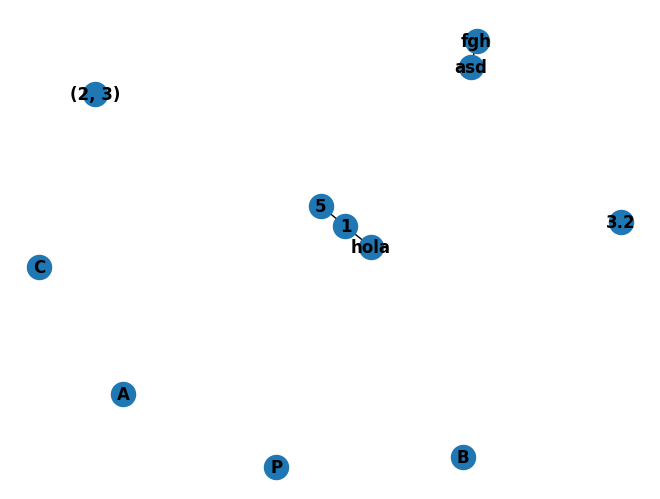

In [13]:
nx.draw(
    G,
    with_labels=True,
    font_weight='bold'
)

Al igual que con los vértices, podemos pasar atributos de aristas a la función:

In [14]:
G.add_edge(3, 7, costo=16)

Un atributo muy importante es el **peso**, ya que se usa para muchos algoritmos. Podemos pasarlo como un atributo normal:

In [15]:
G.add_edge(1, 2, weight=5)
G.edges(data=True)

EdgeDataView([(1, 5, {}), (1, 'hola', {}), (1, 2, {'weight': 5}), ('asd', 'fgh', {}), (3, 7, {'costo': 16})])

O, si queremos añadir varias aristas pesadas, usamos `add_weighted_edges_from`:

In [16]:
G.add_weighted_edges_from([(2, 3, 2), (1, 'A', 3)])
G.edges(data=True)

EdgeDataView([(1, 5, {}), (1, 'hola', {}), (1, 2, {'weight': 5}), (1, 'A', {'weight': 3}), ('asd', 'fgh', {}), (3, 7, {'costo': 16}), (3, 2, {'weight': 2})])

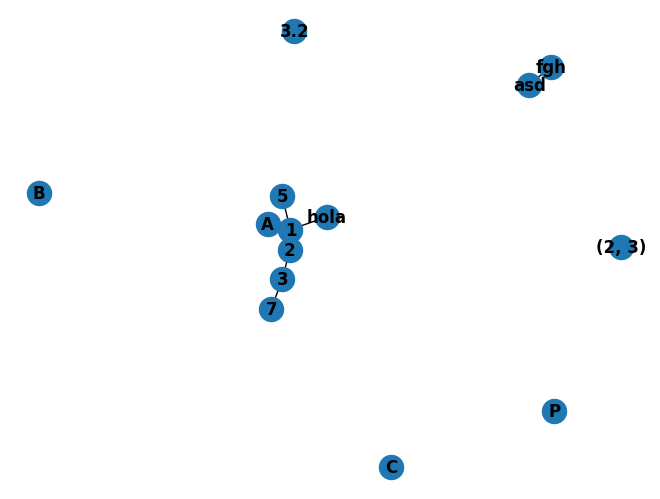

In [17]:
nx.draw(
    G,
    with_labels=True,
    font_weight='bold'
)

Podemos obtener una variedad de atributos de la gráfica:

In [18]:
G.edges[(2, 3)]

{'weight': 2}

In [19]:
G.adj[1]

AtlasView({5: {}, 'hola': {}, 2: {'weight': 5}, 'A': {'weight': 3}})

In [20]:
print(
f"""Lista de los grados por cada vértice: {G.degree}
Grado del vértice A: {G.degree['A']}

Atributos asignados a arista (1, 2): {G.edges[(1, 2)]}

Atributos asignados a arista (2, 1): {G.edges[(2, 1)]}

Lista de vértices adyacentes a 1, con atributos: {G.adj[1]}""")

Lista de los grados por cada vértice: [(1, 4), ('A', 1), ((2, 3), 0), (5, 1), (3.2, 0), ('B', 0), ('C', 0), ('P', 0), ('hola', 1), ('asd', 1), ('fgh', 1), (3, 2), (7, 1), (2, 2)]
Grado del vértice A: 1

Atributos asignados a arista (1, 2): {'weight': 5}

Atributos asignados a arista (2, 1): {'weight': 5}

Lista de vértices adyacentes a 1, con atributos: {5: {}, 'hola': {}, 2: {'weight': 5}, 'A': {'weight': 3}}


## Digráficas

En este caso, las aristas tienen dirección, así que la arista `(1,2)` es diferente de la `(2,1)`:

* Ingrado (`indegree`): Número de aristas que apuntan al nodo.
* Exgrado (`outdegree`): Número de aristas que salen del nodo.
* `Ingrado + Exgrado = Grado`

In [21]:
DG = nx.DiGraph()

In [22]:
DG.add_nodes_from(range(5))

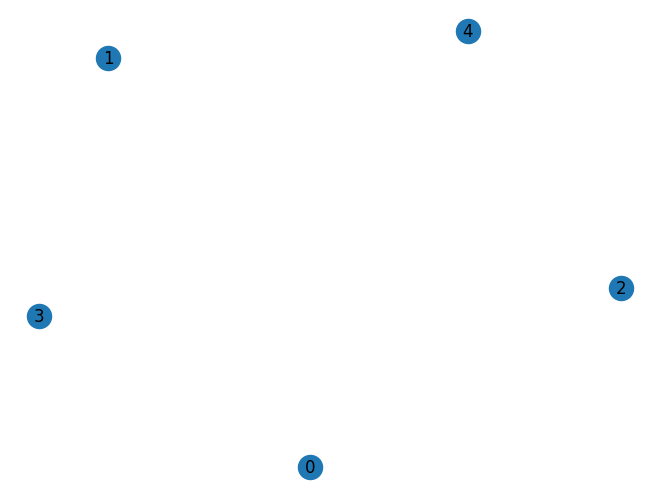

In [23]:
nx.draw(DG, with_labels=True)

In [24]:
DG.add_edges_from([(1, 2), (4, 1), (2, 3), (2, 1), (3, 0)])

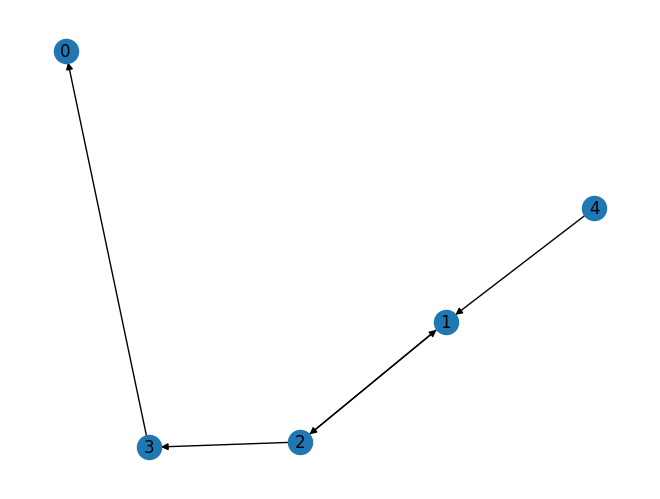

In [25]:
nx.draw(DG, with_labels=True)

Vértices: [0, 1, 2, 3, 4]

Flechas: [(1, 2), (2, 3), (2, 1), (3, 0), (4, 1)]

In-grados: [(0, 1), (1, 2), (2, 1), (3, 1), (4, 0)]

Ex-grados: [(0, 0), (1, 1), (2, 2), (3, 1), (4, 1)]

In-grado del vértice 1: 2

Ex-grado del vértice 2: 2

Ex-vecinos del vértice 1: [2]

In-vecinos del vértice 1: [4, 2]

Flechas que entran a 1 (in-flechas de 1): [(4, 1), (2, 1)]



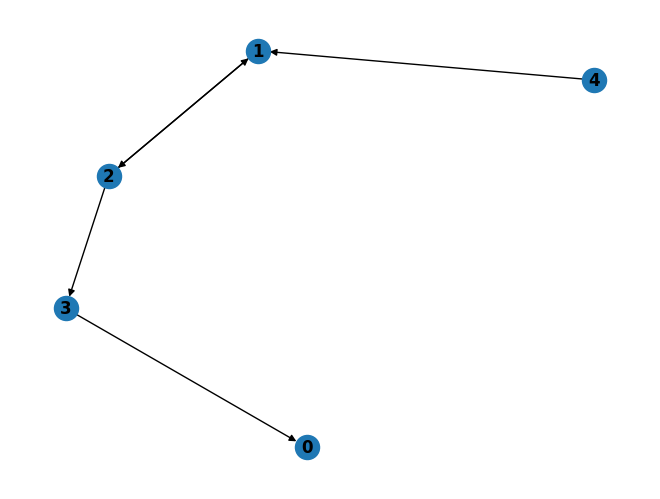

In [26]:
print(
f"""Vértices: {DG.nodes}\n
Flechas: {DG.edges}\n
In-grados: {DG.in_degree}\n
Ex-grados: {DG.out_degree}\n
In-grado del vértice 1: {DG.in_degree[1]}\n
Ex-grado del vértice 2: {DG.out_degree[2]}\n
Ex-vecinos del vértice 1: {list(DG.successors(1))}\n
In-vecinos del vértice 1: {list(DG.predecessors(1))}\n
Flechas que entran a 1 (in-flechas de 1): {DG.in_edges(1)}
""")

nx.draw(
    DG,
    with_labels=True,
    font_weight='bold'
)

Además de lo que hemos visto, también se pueden eliminar objetos de la gráfica. Por ejemplo si removemos el vértice $1$ de $DG$ se elimina este vértice junto con todas las aristas que lo involucran:

Vértices: [0, 2, 3, 4]
Aristas: [(2, 3), (3, 0)]


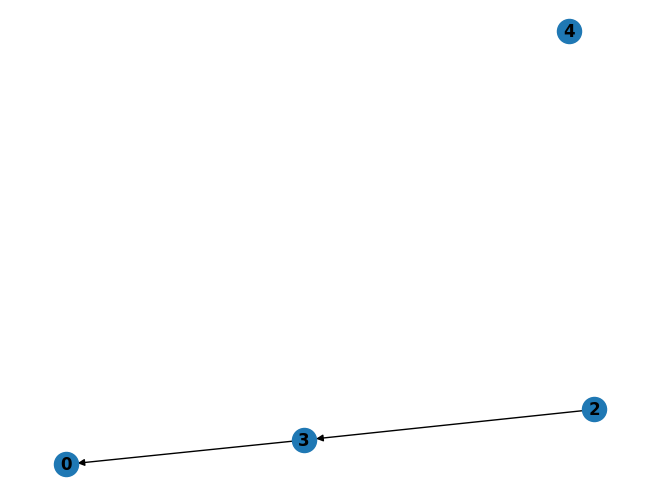

In [27]:
DG.remove_node(1)

print(f"Vértices: {DG.nodes}")
print(f"Aristas: {DG.edges}")
nx.draw(
    DG,
    with_labels=True,
    font_weight='bold'
)

Ahora, construiremos una gráfica tal que dado un entero $n$, sea un ciclo de longitud $n$. Notemos que un polígono regular de $n$ lados con sus vértices numerados del $0$ al $n-1$ es una representación posible de dicha gráfica.

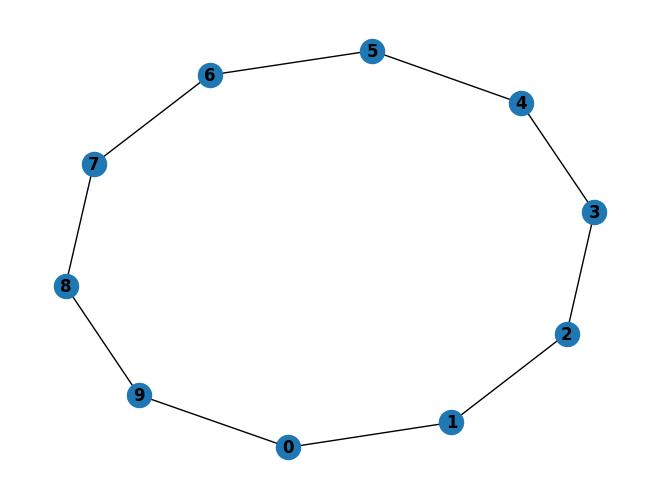

In [28]:
C = nx.Graph()
n = 10

for i in range(n):
    C.add_edge(i, (i+1)%n)

nx.draw(
    C,
    with_labels=True,
    font_weight='bold'
)

## Generadores

Finalmente, introduciremos formas de crear gráficas de manera automática. Esto sirve para poder probar nuestros códigos en gráficas arbitrarias, o que cumplan cierto requisito muy especial, como ser un árbol.

Primero, construyamos una gráfica puramente aleatoria, con $n$ vértices y una probabilidad $p$ de que cada par de vértices esté conectado:

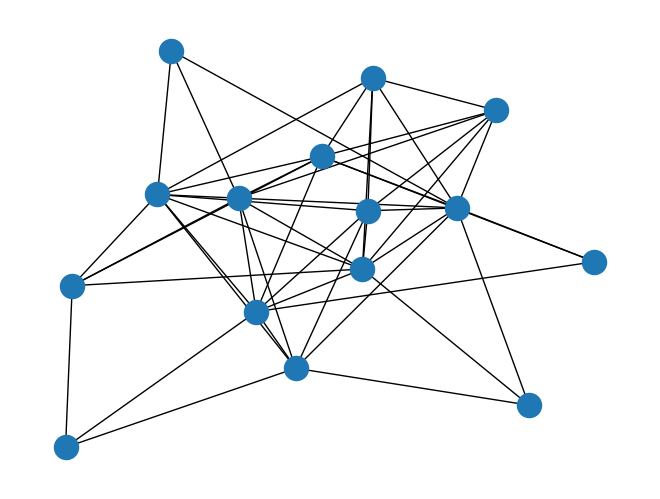

In [29]:
n = 15
p = 0.4
g = nx.gnp_random_graph(n, p)
nx.draw(g)

También podemos construir un árbol (gráfica sin ciclos y en la que entre cualesquiera dos vértices están conectados por un camino).

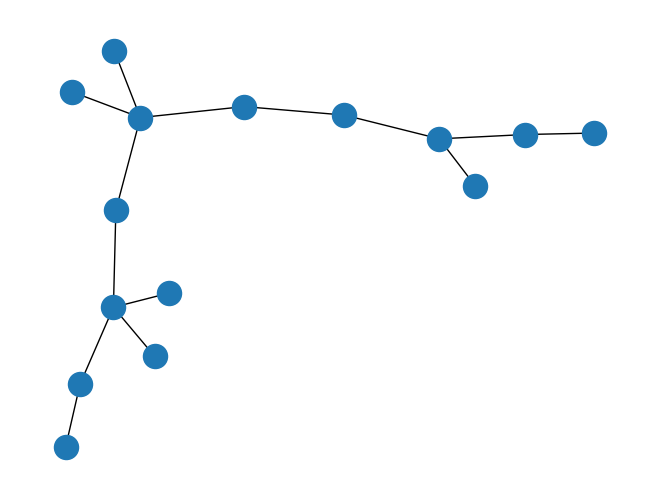

In [30]:
n = 15
g = nx.random_tree(n)
nx.draw(g)

O una gráfica completa (gráfica en la cual cada nodo está conectado a todos los demás).

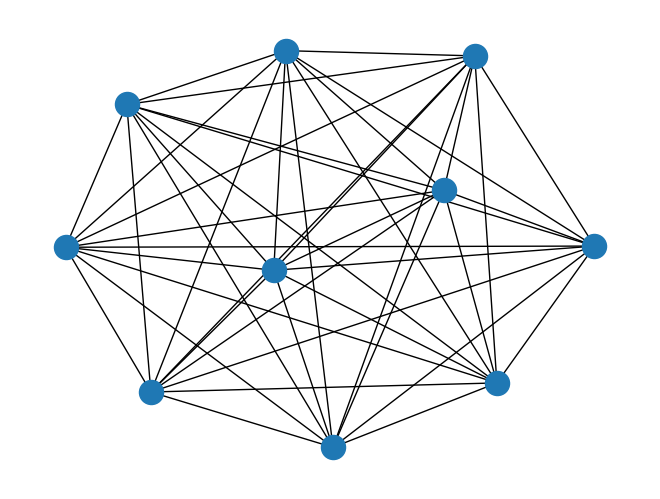

In [31]:
n = 10
g = nx.complete_graph(n)
nx.draw(g)

$K_{10}$

# Graficación

Como vimos anteriormente, usamos el comando `nx.draw` para dibujar nuestras gráficas. Este acepta una variedad de argumentos para definir distintas partes del formato, como colores, grosor, fuentes, etc.

Otra característica importante que podemos controlar es el *layout* de la gráfica, i.e., cómo se distribuyen los nodos en el plano. Idealmente, un buen arreglo hace que las relaciones entre los elementos sean evidentes, procurando que no se encimen o se vea muy amontonado.

Primero, generamos una gráfica aleatoria:

In [32]:
g = nx.gnp_random_graph(30, 0.12)

Calculamos algunos arreglos usando las funciones proporcionadas por `networkx` (https://networkx.org/documentation/stable/reference/drawing.html):

In [33]:
L = [[None, None], [None, None]]
L[0][0] = nx.spring_layout(g)
L[0][1] = nx.spiral_layout(g)
L[1][0] = nx.random_layout(g)
L[1][1] = nx.circular_layout(g)

Y luego los pasamos al argumento `pos` de `nx.draw`:

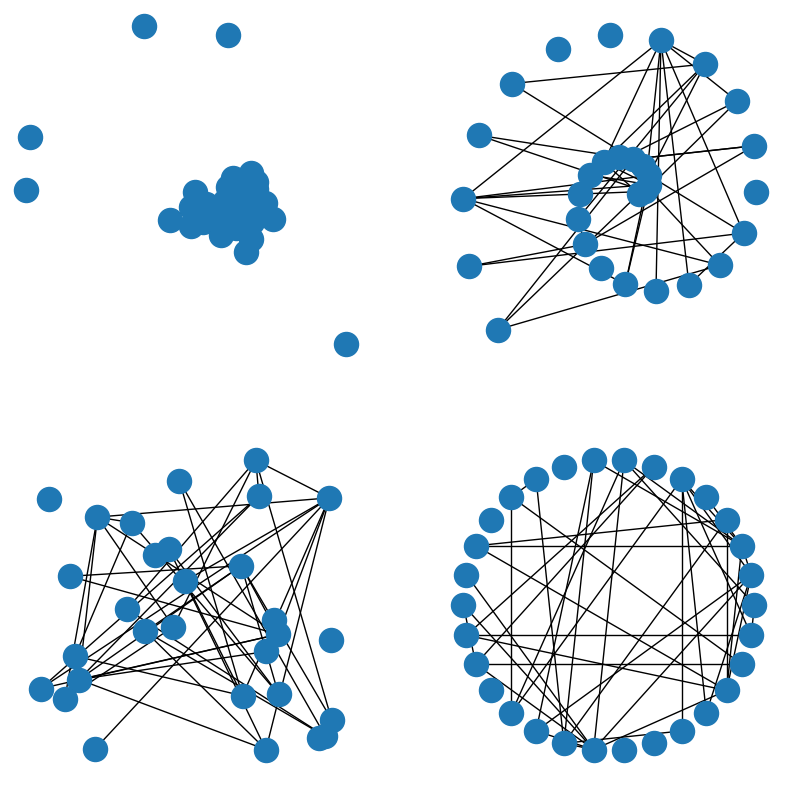

In [34]:
fig, ax = plt.subplots(2, 2, figsize=(10,10))
for i in range(4):
    nx.draw(g, pos=L[i//2][i%2], ax=ax[i//2, i%2])

# Representaciones

Existen muchas maneras de representar una gráfica de forma que pueda guardarse a un archivo. Para entender las diferencias entre cada una, tomemos la siguiente gráfica:

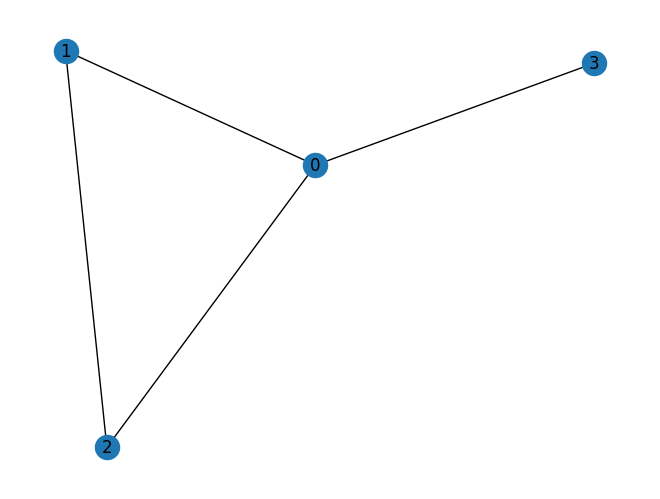

In [35]:
g = nx.Graph()
g.add_edges_from([(0,1), (1,2), (0,2), (0,3)])
nx.draw(g, with_labels=True)

### Lista de adyacencia

Cada línea representa un nodo diferente. La primera entrada indica qué nodo es, y todas las demás los otros nodos a los que está conectado.

In [36]:
nx.write_adjlist(g, "adjlist.txt")

### Lista de aristas

Cada línea tiene tres entradas que representan a una arista: el nodo de origen, el nodo de destino, y todas las propiedades de la arista en forma de un diccionario.

In [37]:
nx.write_edgelist(g, "edgelist.txt")

Si tenemos un archivo generado de esta manera, podemos leerlo con el correspondiente comando `nx.read_*` (i.e., `nx.read_adjlist, nx.read_edgelist`, etc.)

Para consultar una lista de todos los formatos que acepta `networkx`, véase https://networkx.org/documentation/stable/reference/readwrite/index.html

# Herramientas

## pyvis

Si bien `networkx` es muy bueno para crear y manipular gráficas, sus capacidades de graficación son un tanto deficientes. Una librería que busca resolver esto es `pyvis`.

In [38]:
import pyvis

`pyvis` maneja las gráficas de manera diferente que `networkx`, así que tendríamos que leer la documentación si queremos crear una desde cero. Por suerte, `pivis` provee funciones para convertir gráficas de `networkx` a su formato.

En vez de trabajar con una gráfica aleatoria, importemos un archivo que cuenta el número de veces que interactuaron los personajes en la serie de televisión Game of Thrones:

In [39]:
df = pd.read_csv(
    "https://github.com/pupimvictor/NetworkOfThrones/raw/master/stormofswords.csv")
df

,Source,Target,Weight
0,Aemon,Grenn,5
1,Aemon,Samwell,31
2,Aerys,Jaime,18
3,Aerys,Robert,6
4,Aerys,Tyrion,5
...,...,...,...
348,Walder,Petyr,6
349,Walder,Roslin,6
350,Walton,Jaime,10
351,Ygritte,Qhorin,7


Para más detalles, pueden leer el post original: https://www.lyonwj.com/blog/graph-of-thrones-neo4j-social-network-analysis

Podemos convertir esta DataFrame a una gráfica usando `nx.from_pandas_edgelist`. Sin embargo, esta función requiere que las columnas tengan como nombre `source`, `target` y `weight`, así que las renombramos:

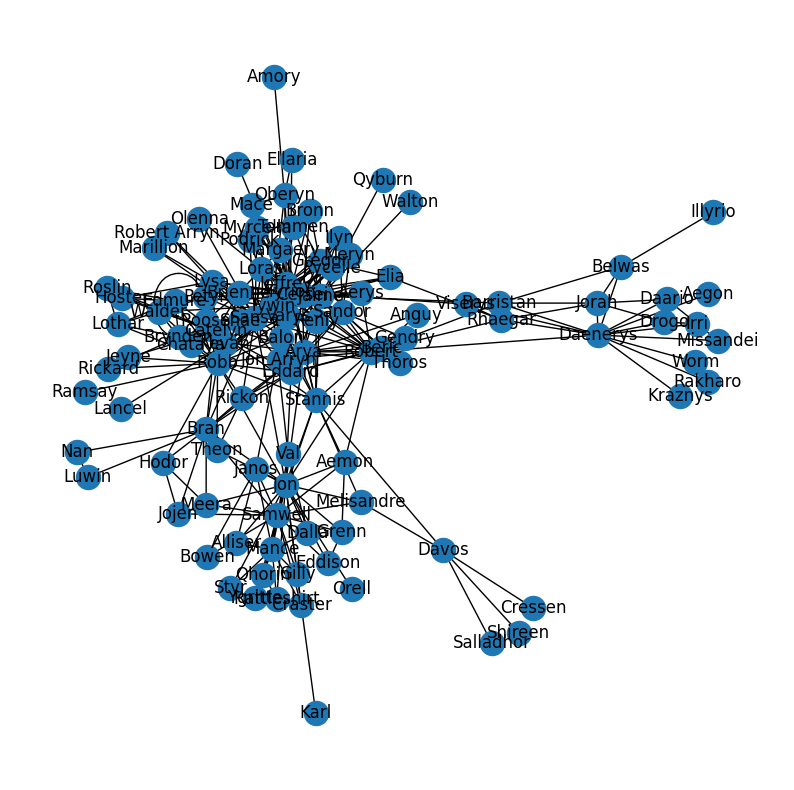

In [40]:
df.columns = ['source', 'target', 'weight']

g = nx.from_pandas_edgelist(df)
fig, ax = plt.subplots(figsize=(10,10))
nx.draw(g, with_labels=True, ax=ax)

Ahora, importamos las clases necesarias:

In [41]:
# !pip install pyvis
from pyvis.network import Network

Creamos una gráfica de `pyvis` vacía y la llenamos con nuestra gráfica de `networkx`:

In [42]:
nt = Network("800px", "800px", notebook=True)
nt.from_nx(g)

Guardamos el resultado como un archivo HTML, que después podemos abrir con cualquier navegador:

In [43]:
%%capture
nt.show("graph.html")

## Gephi/Cytoscape

Gephi y Cytoscape son dos programas diseñados exclusivamente para la visualización y manipulación de gráficas. Una ventaja que tienen sobre `networkx` o `pyvis` es que poseen poderosos algoritmos de organización, para poder ordenar los nodos de una forma que se vea bien

Para poder transferir una gráfica de `networkx` a cualquiera de estos *software*, la forma más sencilla es usando un archivo `.graphml`, el cual podemos escribir usando `nx.write_graphml`:

In [44]:
nx.write_graphml(g, "out.graphml")

Luego, simplemente lo abrimos como un archivo normal en cualquiera de los programas anteriores.

## Graphistry

## Notas

* Gephi en mi opinión produce las mejores visualizaciones, aunque no puede manejar gráficas muy grandes, por lo cual en ese caso es mejor usar Cytoscape.

* Gephi dejó de ser actualizado hace tiempo (2017), y solo soporta Java 8. Adicionalmente, presenta problemas al correr en Linux. En caso de que tengan este sistema operativo y no puedan ver las gráficas, una posible solución es ejecutar `export LIBGL_ALWAYS_SOFTWARE=1` en la terminal antes de correr Gephi.

# Ejercicios

## Ejercicio 1

Escribe una función tal que, para un $n$ dado, genere una gráfica de $2n$ vértices que pueda representarse como un polígono regular, con sus vértices etiquetados desde el 0 hasta el $2n-1$, de modo que los lados representen aristas, y que los vértices diametralmente opuestos también sean adyacentes.

Posteriormente, grafica esta gráfica, de modo que el polígono sea claramente visible y tenga la forma correcta. Deberás de utilizar el atributo `pos` de la función `nx.draw`.

In [45]:
def polygone(n):
    G = nx.Graph()
    for i in range(2*n):
        G.add_edge(i, (i+1)%(2*n))
    for i in range(n):
        G.add_edge(i, i+n)
    nx.draw(G, with_labels=True, pos=nx.circular_layout(G))

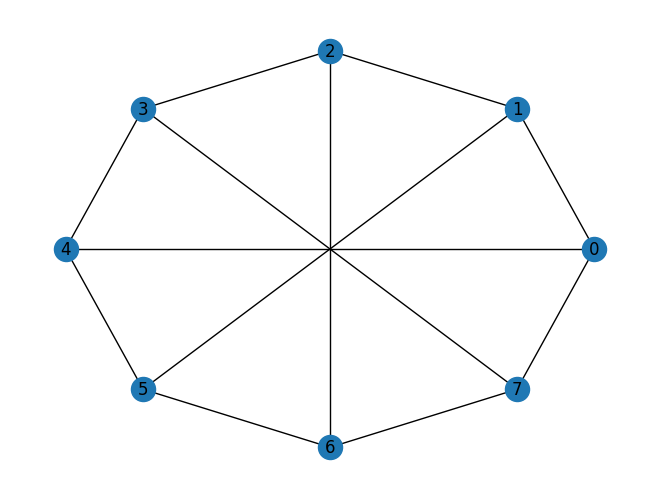

In [46]:
polygone(4)

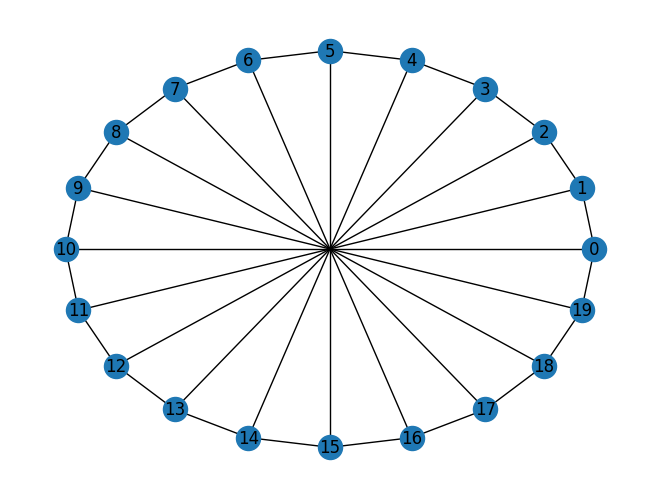

In [47]:
polygone(10)

## Ejercicio 2

La siguiente función genera una gráfica de `n` vértices, etiquetados del `1` hasta el `2n` de manera aleatoria. Cada par de vértices tiene una probabilidad `p` de estar conectado:

In [48]:
def random_graph(n, p, seed=42):
    np.random.seed(seed)
    g = nx.gnp_random_graph(n, p, seed=seed)
    labels = np.random.choice(range(1, 2*n), n, replace=False)
    mapping = {i: labels[i] for i in range(n)}
    g = nx.relabel_nodes(g, mapping)
    return g

La utilizamos para generar algunas gráficas:

In [49]:
g1 = random_graph(5, 0.4)
g2 = random_graph(10, 0.3)
g3 = random_graph(15, 0.2)

Escribe una función que tome una gráfica $G$, tome cada nodo y lo multiplique por todos sus adyacentes, y regrese la suma de todos estos productos. En caso de que un vértice no tenga ningún nodo adyacente, toma su valor original.

Por ejemplo, supongamos que tenemos la gráfica $G$:

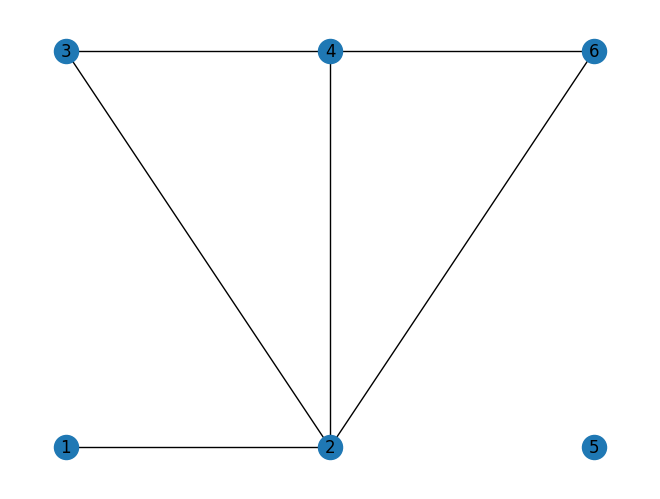

In [50]:
G = nx.Graph()
G.add_nodes_from([1,2,3,4,5,6])
G.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 6), (2, 6), (2, 4)])

pos = {1: (0,0), 2:(1,0), 3:(0,1), 4:(1,1), 5:(2,0), 6:(2,1)}
nx.draw(G, with_labels=True, pos=pos)

Lo que debe de regresar tu función es:

$$
\begin{align}
    &(1 \cdot 2)\\
    +\ &(2 \cdot 1 \cdot 3 \cdot 4 \cdot 6)\\
    +\ &(3 \cdot 2 \cdot 4)\\
    +\ &(4 \cdot 2 \cdot 3 \cdot 6)\\
    +\ &5\\
    +\ &(6 \cdot 2 \cdot 4) \\
    =\ &367
\end{align}
$$

In [51]:
def graph_sum(G):
    suma = 0
    for node in G.nodes:
        temp = node
        for neighbor in G.adj[node]:
            temp *= neighbor
        suma += temp
    return suma

In [52]:
# No alteres esta celda

print(f"""\
Resultado obtenido para la gráfica 1: {graph_sum(g1)}. Esperado: 986
Resultado obtenido para la gráfica 2: {graph_sum(g2)}. Esperado: 1377825
Resultado obtenido para la gráfica 3: {graph_sum(g3)}. Esperado: 5344401\
"""
)

Resultado obtenido para la gráfica 1: 986. Esperado: 986
Resultado obtenido para la gráfica 2: 1377825. Esperado: 1377825
Resultado obtenido para la gráfica 3: 5344401. Esperado: 5344401


## Ejercicio 3

Escribe una función que, dada una gráfica $G$, genere su [complemento](https://en.wikipedia.org/wiki/Complement_graph). Compara tu resultado con la función `nx.complement` (para comparar tendrás que usar la función `nx.is_isomorphic`, de otra manera regresará que no son iguales, a pesar de tener los mismos vértices y aristas).

In [53]:
def graph_complement(G):
    C = nx.complete_graph(G.nodes)
    for edge in G.edges:
        C.remove_edge(*edge)
    return C

In [54]:
# No alteres esta celda
ans = ["Falso", "Verdadero"]

print(
f"""\
La gráfica obtenida con nuestra función es isomorfa a la obtenida con NetworkX:
Gráfica 1: {ans[nx.is_isomorphic(nx.complement(g1), graph_complement(g1))]}
Gráfica 2: {ans[nx.is_isomorphic(nx.complement(g2), graph_complement(g2))]}
Gráfica 2: {ans[nx.is_isomorphic(nx.complement(g3), graph_complement(g3))]}\
""")

La gráfica obtenida con nuestra función es isomorfa a la obtenida con NetworkX:
Gráfica 1: Verdadero
Gráfica 2: Verdadero
Gráfica 2: Verdadero
